In [3]:
# Imports
import matplotlib
import pandas as pd
import seaborn as sns
import os
import pickle

from os.path import join

%matplotlib inline

### Find total number of images


In [4]:
!find Images -type f | grep -v ".DS_Store" | wc -l

find: ‘Images’: No such file or directory
0


### Find total number of sequences

In [44]:
!find Images -mindepth 2 -maxdepth 2 -type d | wc -l

     200


### Find total number of subjects

In [3]:
!ls -l Images/ | grep -v "total 0" | wc -l

      25


### Load subjects + images and associated scores into pandas dataframe for further analysis

In [5]:
images = []
sequences = []
image_sequences = []

pspi_scores = []
opr_scores = []

aff_scores = []
sen_scores = []
vas_scores = []

for subject_id in os.listdir('Images'):
    if subject_id != '.DS_Store':
        for sequence_id in os.listdir(join('Images', subject_id)):
            if sequence_id != '.DS_Store':
                sequences.append(sequence_id)
                for image in os.listdir(join('Images', subject_id, sequence_id)):
                    if image != '.DS_Store':
                        images.append(image.split('.')[0])
                        image_sequences.append(sequence_id)
                for pspi_file in os.listdir(join('Frame_Labels', 'PSPI', subject_id, sequence_id)):
                    with open(join('Frame_Labels', 'PSPI', subject_id, sequence_id, pspi_file), 'r') as f_in:
                        pspi_scores.append(float(f_in.read().strip()))
        for aff_file in os.listdir(join('Sequence_Labels', 'AFF', subject_id)):
            with open(join('Sequence_Labels', 'AFF', subject_id, aff_file), 'r') as f_in:
                aff_scores.append(float(f_in.read().strip()))
        for opr_file in os.listdir(join('Sequence_Labels', 'OPR', subject_id)):
            with open(join('Sequence_Labels', 'OPR', subject_id, opr_file), 'r') as f_in:
                opr_scores.append(float(f_in.read().strip()))
        for sen_file in os.listdir(join('Sequence_Labels', 'SEN', subject_id)):
            with open(join('Sequence_Labels', 'SEN', subject_id, sen_file), 'r') as f_in:
                sen_scores.append(float(f_in.read().strip()))
        for vas_file in os.listdir(join('Sequence_Labels', 'VAS', subject_id)):
            with open(join('Sequence_Labels', 'VAS', subject_id, vas_file), 'r') as f_in:
                vas_scores.append(float(f_in.read().strip()))

image_data = {'image': images,
              'image_sequence': image_sequences,
              'pspi_score': pspi_scores}

sequence_data = {'sequence': sequences, 
                 'aff_score': aff_scores, 
                 'opr_score': opr_scores, 
                 'sen_score': sen_scores,
                 'vas_score': vas_scores}

image_df = pd.DataFrame(data=image_data)
sequence_df = pd.DataFrame(data=sequence_data)

OSError: [Errno 2] No such file or directory: 'Images'

In [40]:
print 'Examples of image identifiers:\n{}\n'.format(images[:10])
print 'Examples of sequence identifiers:\n{}\n'.format(sequences[:10])
print 'Examples of PSPI scores:\n{}\n'.format(pspi_scores[:10])
print 'Examples of AFF scores:\n{}\n'.format(aff_scores[:10])
print 'Examples of OPR scores:\n{}\n'.format(opr_scores[:10])
print 'Examples of SEN scores:\n{}\n'.format(sen_scores[:10])
print 'Examples of VAS scores:\n{}\n'.format(vas_scores[:10])

Examples of image identifiers:
['ll042t1aaaff001', 'll042t1aaaff002', 'll042t1aaaff003', 'll042t1aaaff004', 'll042t1aaaff005', 'll042t1aaaff006', 'll042t1aaaff007', 'll042t1aaaff008', 'll042t1aaaff009', 'll042t1aaaff010']

Examples of sequence identifiers:
['ll042t1aaaff', 'll042t1aaunaff', 'll042t1aeunaff', 'll042t1afaff', 'll042t1afunaff', 'll042t1aiaff', 'll042t1aiunaff', 'll042t2afaff', 'jh043t1aeaff', 'jh043t1afaff']

Examples of PSPI scores:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Examples of AFF scores:
[7.0, 1.0, 2.0, 5.0, 1.0, 11.0, 1.0, 3.0, 13.0, 4.0]

Examples of OPR scores:
[3.0, 0.0, 0.0, 3.0, 0.0, 4.0, 0.0, 1.0, 2.0, 1.0]

Examples of SEN scores:
[10.0, 2.0, 2.0, 8.0, 3.0, 12.0, 3.0, 6.0, 12.0, 3.0]

Examples of VAS scores:
[6.0, 1.0, 2.0, 5.0, 2.0, 8.0, 1.0, 4.0, 6.0, 2.0]



### Examine PSPI Score distribution across images

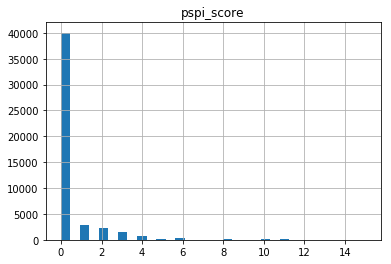

In [62]:
df2 = pd.DataFrame({
         'pspi_score': pspi_scores
         }, index=images)
hist = df2.hist(bins=32)

In [29]:
image_df['pspi_score'].value_counts().sort_index() / len(image_df)

0.0     0.827080
1.0     0.060106
2.0     0.048576
3.0     0.029175
4.0     0.016571
5.0     0.005000
6.0     0.005579
7.0     0.001095
8.0     0.001632
9.0     0.000661
10.0    0.001384
11.0    0.001570
12.0    0.000992
13.0    0.000455
14.0    0.000021
15.0    0.000103
Name: pspi_score, dtype: float64

In [79]:
image_df['pspi_score'].value_counts().sort_index()

0.0     40029
1.0      2909
2.0      2351
3.0      1412
4.0       802
5.0       242
6.0       270
7.0        53
8.0        79
9.0        32
10.0       67
11.0       76
12.0       48
13.0       22
14.0        1
15.0        5
Name: pspi_score, dtype: int64

In [30]:
# We can also explicitly get the % of non-zero scores from the dataset
print float(len(image_df[image_df['pspi_score'] > 0.0])) / float(len(image_df)) * 100

17.292036861


In [13]:
df2.describe()

,pspi_score
count,48398.000000
mean,0.446981
std,1.302021
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15.000000


### Examine Average PSPI Score distribution across sequences

In [175]:
# Avg PSPI scores are based on top 3 scores from each sequence
image_df_modified = image_df.groupby(['image_sequence', 'pspi_score']).count().reset_index()
image_df_modified.columns = ['image_sequence', 'pspi_score', 'pspi_score_count']
image_df_modified['rank'] = image_df_modified.groupby('image_sequence')['pspi_score_count'].rank(ascending=False)
image_df_modified = image_df_modified[image_df_modified['rank'] < 4]
image_sequence_distribution = image_df_modified[['image_sequence','pspi_score']]
avg_pspi_scores = image_sequence_distribution.groupby('image_sequence').mean().reset_index().sort_values('image_sequence')['pspi_score'].tolist()

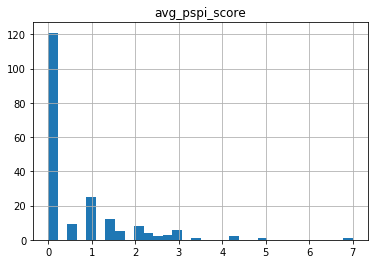

In [178]:
df2 = pd.DataFrame({
         'avg_pspi_score': avg_pspi_scores
         }, index=sequences)
hist = df2.hist(bins=32)

### Examine AFF Score distribution across sequences

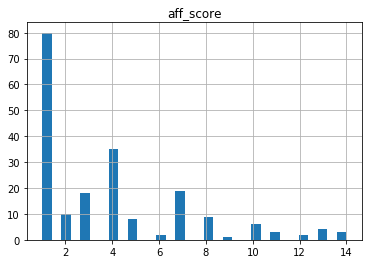

In [63]:
df2 = pd.DataFrame({
         'aff_score': aff_scores
         }, index=sequences)
hist = df2.hist(bins=32)

In [47]:
sequence_df['aff_score'].value_counts().sort_index() / len(sequence_df)

1.0     0.400
2.0     0.050
3.0     0.090
4.0     0.175
5.0     0.040
6.0     0.010
7.0     0.095
8.0     0.045
9.0     0.005
10.0    0.030
11.0    0.015
12.0    0.010
13.0    0.020
14.0    0.015
Name: aff_score, dtype: float64

In [81]:
sequence_df['aff_score'].value_counts().sort_index()

1.0     80
2.0     10
3.0     18
4.0     35
5.0      8
6.0      2
7.0     19
8.0      9
9.0      1
10.0     6
11.0     3
12.0     2
13.0     4
14.0     3
Name: aff_score, dtype: int64

In [48]:
# We can also explicitly get the % of non-zero scores from the dataset
print float(len(sequence_df[sequence_df['aff_score'] > 0.0])) / float(len(sequence_df)) * 100

100.0


In [49]:
df2.describe()

,aff_score
count,200.000000
mean,3.855000
std,3.358627
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,14.000000


### Examine OPR Score distribution across sequences

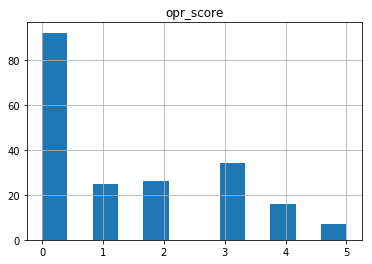

In [64]:
df2 = pd.DataFrame({
         'opr_score': opr_scores
         }, index=sequences)
hist = df2.hist(bins=12)

In [55]:
sequence_df['opr_score'].value_counts().sort_index() / len(sequence_df)

0.0    0.460
1.0    0.125
2.0    0.130
3.0    0.170
4.0    0.080
5.0    0.035
Name: opr_score, dtype: float64

In [82]:
sequence_df['opr_score'].value_counts().sort_index()

0.0    92
1.0    25
2.0    26
3.0    34
4.0    16
5.0     7
Name: opr_score, dtype: int64

In [57]:
# We can also explicitly get the % of non-zero scores from the dataset
print float(len(sequence_df[sequence_df['opr_score'] > 0.0])) / float(len(sequence_df)) * 100

54.0


In [58]:
df2.describe()

,aff_score
count,200.000000
mean,3.855000
std,3.358627
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,14.000000


### Examine SEN Score distribution across sequences

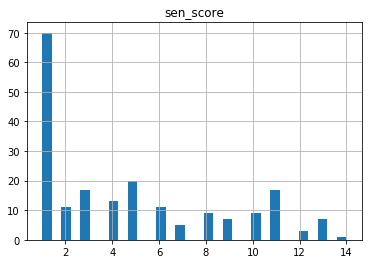

In [65]:
df2 = pd.DataFrame({
         'sen_score': sen_scores
         }, index=sequences)
hist = df2.hist(bins=32)

In [66]:
sequence_df['sen_score'].value_counts().sort_index() / len(sequence_df)

1.0     0.350
2.0     0.055
3.0     0.085
4.0     0.065
5.0     0.100
6.0     0.055
7.0     0.025
8.0     0.045
9.0     0.035
10.0    0.045
11.0    0.085
12.0    0.015
13.0    0.035
14.0    0.005
Name: sen_score, dtype: float64

In [83]:
sequence_df['sen_score'].value_counts().sort_index()

1.0     70
2.0     11
3.0     17
4.0     13
5.0     20
6.0     11
7.0      5
8.0      9
9.0      7
10.0     9
11.0    17
12.0     3
13.0     7
14.0     1
Name: sen_score, dtype: int64

In [68]:
# We can also explicitly get the % of non-zero scores from the dataset
print float(len(sequence_df[sequence_df['sen_score'] > 0.0])) / float(len(sequence_df)) * 100

100.0


In [69]:
df2.describe()

,sen_score
count,200.000000
mean,4.745000
std,3.898199
min,1.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,14.000000


### Examine VAS Score distribution across sequences

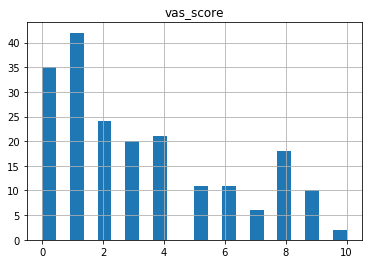

In [74]:
df2 = pd.DataFrame({
         'vas_score': vas_scores
         }, index=sequences)
hist = df2.hist(bins=22)

In [71]:
sequence_df['vas_score'].value_counts().sort_index() / len(sequence_df)

0.0     0.175
1.0     0.210
2.0     0.120
3.0     0.100
4.0     0.105
5.0     0.055
6.0     0.055
7.0     0.030
8.0     0.090
9.0     0.050
10.0    0.010
Name: vas_score, dtype: float64

In [84]:
sequence_df['vas_score'].value_counts().sort_index()

0.0     35
1.0     42
2.0     24
3.0     20
4.0     21
5.0     11
6.0     11
7.0      6
8.0     18
9.0     10
10.0     2
Name: vas_score, dtype: int64

In [75]:
# We can also explicitly get the % of non-zero scores from the dataset
print float(len(sequence_df[sequence_df['vas_score'] > 0.0])) / float(len(sequence_df)) * 100

82.5


In [76]:
df2.describe()

,vas_score
count,200.000000
mean,3.255000
std,2.889937
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,10.000000


### Examine Score correlations

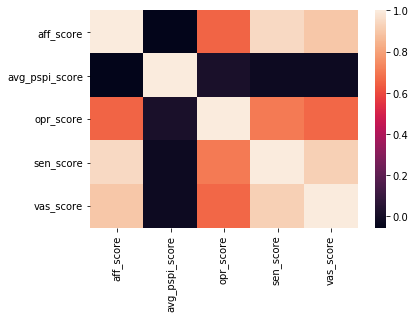

In [180]:
heatmap_data = {'avg_pspi_score': avg_pspi_scores, 
                'aff_score': aff_scores, 
                'opr_score': opr_scores, 
                'sen_score': sen_scores,
                'vas_score': vas_scores}

heatmap_df = pd.DataFrame(data=heatmap_data)
corr = heatmap_df.corr()

# plot the heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)